In [1]:
from lenskit.datasets import MovieLens

path_to_ml_data = "/Users/user/Documents/Nauka/Studia/Magisterskie/Magisterka/dane/MovieLensSmall"
ml_data = MovieLens(path=path_to_ml_data)

In [2]:
ml_data.ratings

,user,item,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
ml_data.movies

,title,genres
item,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [4]:
ml_data.links

,imdbId,tmdbId
item,,
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862
...,...,...
193581,5476944,432131
193583,5914996,445030
193585,6397426,479308


In [5]:
ml_data.tags

,user,item,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


# Analiza uzytkowników i ich ocen

### Jaki centyl uzytkowników oceniło daną liczbę filmów

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [8]:
def get_percentile_values(data_ascending):
    percentiles = range(0, 100, 10)
    percentiles_values = dict()
    for i in percentiles:
        percentiles_values[i] = np.percentile(data_ascending, i)
    percentiles_values[99] = np.percentile(data_ascending, 95)
    percentiles_values[100] = np.percentile(data_ascending, 100)
    return percentiles_values

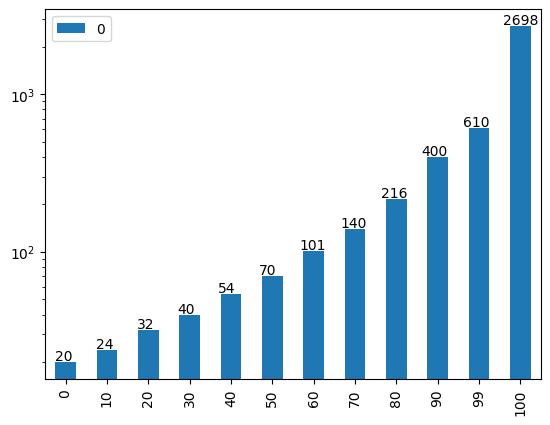

In [9]:
number_of_scores_per_user = ml_data.ratings['user'].value_counts(ascending=True).values

percentiles_values = get_percentile_values(number_of_scores_per_user)
df = pd.DataFrame(percentiles_values.values(), index=percentiles_values.keys())

ax = df.plot(kind='bar', logy=True)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 0.985, p.get_height() * 1.025))

plt.show()

Najmniejsza liczba ocen dana przez pojedynczego uzytkownika to 20. Największa liczba ocen dana przez pojedynczego uzytkownika to 32202.
Są to wartości istotnie skrajne, bowiem 50 centyl - mediana liczby ocen - wynosi 71. 90% uzytkowników oceniło 353 filmy lub więcej, a 99% z nich oceniło 1228 filmów lub więcej.

### Jak duzo głosów zostało oddanych na poszczególne filmy

In [10]:
movies_by_number_of_reviews = ml_data.ratings['item'].value_counts()
print(movies_by_number_of_reviews)

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: item, Length: 9724, dtype: int64


5 najpopularniejszych filmów wśród głosów uzytkowników

In [11]:
top5_ids = movies_by_number_of_reviews.keys()[0:5]
ml_data.movies.loc[top5_ids]

,title,genres
356,Forrest Gump (1994),Comedy|Drama|Romance|War
318,"Shawshank Redemption, The (1994)",Crime|Drama
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


Nie wszystkie filmy dostały jakiekolwiek głosy

In [12]:
ids_without_votes = []
for i, row in ml_data.movies.iterrows():
    if i not in movies_by_number_of_reviews.index:
        ids_without_votes.append(i)
print(f"Liczba filmów bez jakichkolwiek ocen: {len(ids_without_votes)}")

Liczba filmów bez jakichkolwiek ocen: 18


Wizualizacja popularności filmów na podstawie centyli liczby ocen filmów.

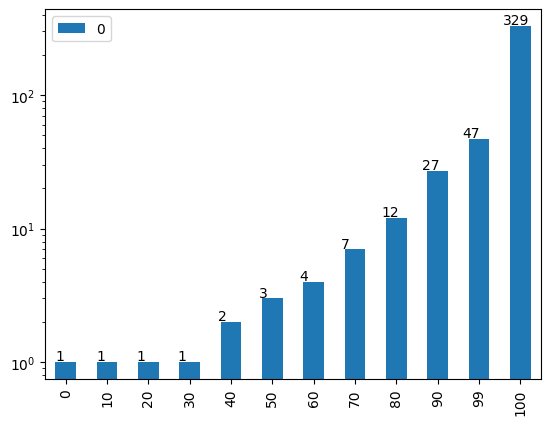

In [13]:
percentiles_values = get_percentile_values(data_ascending=ml_data.ratings['item'].value_counts(ascending=True))

df = pd.DataFrame(percentiles_values.values(), index=percentiles_values.keys())

ax = df.plot(kind='bar', logy=True)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 0.985, p.get_height() * 1.025))

plt.show()

Co najmniej 10% filmów, z tych, które mają jakąkolwiek ocenę, zostało ocenione tylko jeden raz. Mediana liczby otrzymanych ocen przez pojedynczy film to zaledwie 6 ocen.
Na tej podstawie mozna zauwazyć, ze niewielka część bardzo popularnych filmów dostaje ogromną część ocen. Około 10 procent najpopularniejszych filmów dostaje więcej niz 413 ocen, a najbardziej popularny film został oceniony 81491 razy.


## Obróbka danych i tworzenie zbiorów treningowego, testowego i walidacyjnego
Analiza danych wykazała, ze występują filmy, które nie otrzymały zadnej oceny - mozna je usunąć z bazy danych.
Dodatkowo, kazdy film mógłby posiadać dodatkowe kolumny na uśrednioną ocenę uzytkowników i współczynnik popularności filmu, co mogłoby wspomóc trening.
Oprócz tego, przepisane zostaną gatunki kazdego z filmów do osobnych kolumn.

In [14]:
print(f"Liczba filmów przed usunięciem filmów bez ocen: {len(ml_data.movies)}")
movies_optimized = ml_data.movies.drop(ids_without_votes)
print(f"Liczba filmów po usunięciu filmów bez ocen: {len(movies_optimized)}")

print(f"Liczba linków przed usunięciem linków do filmów bez ocen: {len(ml_data.links)}")
movies_optimized = ml_data.movies.drop(ids_without_votes)
print(f"Liczba filmów po usunięciu filmów bez ocen: {len(movies_optimized)}")

Liczba filmów przed usunięciem filmów bez ocen: 9742
Liczba filmów po usunięciu filmów bez ocen: 9724
Liczba linków przed usunięciem linków do filmów bez ocen: 9742
Liczba filmów po usunięciu filmów bez ocen: 9724


### Średnia ocena i popularność filmu
Ponizej dodane zostały kolumny określające średnią ocenę, jaką film otrzymał oraz współczynnik popularności danego filmu, określający stosunkowo jak duzo głosów dany film otrzymał. Współczynnik ten dązy do 1.0, dla najbardziej popularnego filmu.

In [15]:
means = []
popularity = []
most_popular_movie_num_ratings = movies_by_number_of_reviews.values[0]
i = 0
all_movies = len(movies_optimized)
for id, _ in movies_optimized.iterrows():
    i += 1
    ratings = ml_data.ratings.loc[ml_data.ratings['item'] == id, 'rating'].values
    means.append(np.mean(ratings))
    popularity.append(round(float(len(ratings) / most_popular_movie_num_ratings), 4))
    print(f"{i}/{all_movies}")
movies_optimized['mean'] = means
movies_optimized['popularity'] = popularity
# Around 20m to run

1/9724
2/9724
3/9724
4/9724
5/9724
6/9724
7/9724
8/9724
9/9724
10/9724
11/9724
12/9724
13/9724
14/9724
15/9724
16/9724
17/9724
18/9724
19/9724
20/9724
21/9724
22/9724
23/9724
24/9724
25/9724
26/9724
27/9724
28/9724
29/9724
30/9724
31/9724
32/9724
33/9724
34/9724
35/9724
36/9724
37/9724
38/9724
39/9724
40/9724
41/9724
42/9724
43/9724
44/9724
45/9724
46/9724
47/9724
48/9724
49/9724
50/9724
51/9724
52/9724
53/9724
54/9724
55/9724
56/9724
57/9724
58/9724
59/9724
60/9724
61/9724
62/9724
63/9724
64/9724
65/9724
66/9724
67/9724
68/9724
69/9724
70/9724
71/9724
72/9724
73/9724
74/9724
75/9724
76/9724
77/9724
78/9724
79/9724
80/9724
81/9724
82/9724
83/9724
84/9724
85/9724
86/9724
87/9724
88/9724
89/9724
90/9724
91/9724
92/9724
93/9724
94/9724
95/9724
96/9724
97/9724
98/9724
99/9724
100/9724
101/9724
102/9724
103/9724
104/9724
105/9724
106/9724
107/9724
108/9724
109/9724
110/9724
111/9724
112/9724
113/9724
114/9724
115/9724
116/9724
117/9724
118/9724
119/9724
120/9724
121/9724
122/9724
123/9724
1

In [16]:
movies_optimized['mean'] = movies_optimized['mean'].round(decimals = 4)
movies_optimized

,title,genres,mean,popularity
item,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.9209,0.6535
2,Jumanji (1995),Adventure|Children|Fantasy,3.4318,0.3343
3,Grumpier Old Men (1995),Comedy|Romance,3.2596,0.1581
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.3571,0.0213
5,Father of the Bride Part II (1995),Comedy,3.0714,0.1489
...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0000,0.0030
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5000,0.0030
193585,Flint (2017),Drama,3.5000,0.0030


In [17]:
backup_cpy = movies_optimized.copy()

### Średnia ocena filmu z uwzględnieniem subiektywnego rozkładu ocen uzytkowników

Tworzenie nowego dataframe'u dla uzytkowników, gdzie dodane zostają pomocnicze kolumny dla średniej oceny dawanej przez danego uzytkownika oraz współczynnika tendencji oceniania filmów

In [18]:
user_means_tendencies = dict()
unique_users = ml_data.ratings.user.unique()
for user in unique_users:
    ratings_from_user = ml_data.ratings.loc[ml_data.ratings['user'] == user, ['item', 'rating']].values
    user_mean = np.mean(ratings_from_user[:, 1])
    tendencies = []
    for item, user_rating in ratings_from_user:
        movie_mean = movies_optimized.loc[int(item), 'mean']
        tendencies.append(user_rating - movie_mean)
    user_tendency = np.mean(tendencies)
    user_means_tendencies[user] = [user_mean, user_tendency]
    print(f"{user}/{len(unique_users)}")
user_df = pd.DataFrame.from_dict(user_means_tendencies, orient='index', columns=['mean', 'tendency'])

1/610
2/610
3/610
4/610
5/610
6/610
7/610
8/610
9/610
10/610
11/610
12/610
13/610
14/610
15/610
16/610
17/610
18/610
19/610
20/610
21/610
22/610
23/610
24/610
25/610
26/610
27/610
28/610
29/610
30/610
31/610
32/610
33/610
34/610
35/610
36/610
37/610
38/610
39/610
40/610
41/610
42/610
43/610
44/610
45/610
46/610
47/610
48/610
49/610
50/610
51/610
52/610
53/610
54/610
55/610
56/610
57/610
58/610
59/610
60/610
61/610
62/610
63/610
64/610
65/610
66/610
67/610
68/610
69/610
70/610
71/610
72/610
73/610
74/610
75/610
76/610
77/610
78/610
79/610
80/610
81/610
82/610
83/610
84/610
85/610
86/610
87/610
88/610
89/610
90/610
91/610
92/610
93/610
94/610
95/610
96/610
97/610
98/610
99/610
100/610
101/610
102/610
103/610
104/610
105/610
106/610
107/610
108/610
109/610
110/610
111/610
112/610
113/610
114/610
115/610
116/610
117/610
118/610
119/610
120/610
121/610
122/610
123/610
124/610
125/610
126/610
127/610
128/610
129/610
130/610
131/610
132/610
133/610
134/610
135/610
136/610
137/610
138/610
139/

In [19]:
user_df

,mean,tendency
1,4.366379,0.809153
2,3.948276,0.005155
3,2.435897,-1.149141
4,3.555556,-0.196337
5,3.636364,-0.075782
...,...,...
606,3.657399,0.071701
607,3.786096,0.278158
608,3.134176,-0.150770
609,3.270270,-0.223657


Obliczanie współczynnika tendencji dla kazdego z filmów

In [20]:
movies_tendencies = dict()
num_movies = len(movies_optimized)
for id, movie in movies_optimized.iterrows():
    ratings_from_users = ml_data.ratings.loc[ml_data.ratings['item'] == id, ['user', 'rating']].values
    movie_mean = movie['mean']
    tendencies = []
    for user, user_rating in ratings_from_users:
        user_mean = user_df.loc[user, 'mean']
        tendencies.append(user_rating - user_mean)
    movies_tendencies[id] = np.mean(tendencies)
    print(f"{id}/{num_movies}")
# 27m to run

1/9724
2/9724
3/9724
4/9724
5/9724
6/9724
7/9724
8/9724
9/9724
10/9724
11/9724
12/9724
13/9724
14/9724
15/9724
16/9724
17/9724
18/9724
19/9724
20/9724
21/9724
22/9724
23/9724
24/9724
25/9724
26/9724
27/9724
28/9724
29/9724
30/9724
31/9724
32/9724
34/9724
36/9724
38/9724
39/9724
40/9724
41/9724
42/9724
43/9724
44/9724
45/9724
46/9724
47/9724
48/9724
49/9724
50/9724
52/9724
53/9724
54/9724
55/9724
57/9724
58/9724
60/9724
61/9724
62/9724
63/9724
64/9724
65/9724
66/9724
68/9724
69/9724
70/9724
71/9724
72/9724
73/9724
74/9724
75/9724
76/9724
77/9724
78/9724
79/9724
80/9724
81/9724
82/9724
83/9724
85/9724
86/9724
87/9724
88/9724
89/9724
92/9724
93/9724
94/9724
95/9724
96/9724
97/9724
99/9724
100/9724
101/9724
102/9724
103/9724
104/9724
105/9724
106/9724
107/9724
108/9724
110/9724
111/9724
112/9724
113/9724
116/9724
117/9724
118/9724
119/9724
121/9724
122/9724
123/9724
125/9724
126/9724
128/9724
129/9724
132/9724
135/9724
137/9724
140/9724
141/9724
144/9724
145/9724
146/9724
147/9724
148/9724

Nakładanie funkcji unbias na kazdą ocenę, otrzymując tym samym nową listę ocen filmów, ale bez wpływu stronniczości uzytkownika.

In [21]:

def unbias_rating(user_mean, movie_mean, user_tendency, movie_tendency):
    beta = 0.5
    if user_tendency >= 0 and movie_tendency >= 0:
        return max([user_mean + movie_tendency, movie_mean + user_tendency])
    if user_tendency < 0 and movie_tendency < 0:
        return min([user_mean + movie_tendency, movie_mean + user_tendency])
    if user_tendency < 0 and movie_tendency >= 0 and user_mean < movie_mean:
        return min([max([user_mean, (movie_mean + user_tendency) * beta + (user_mean + movie_tendency) * (1 - beta)]), movie_mean])
    if user_tendency < 0 and movie_tendency >= 0 and user_mean >= movie_mean:
        return movie_mean * beta + user_mean * (1 - beta)
    if user_tendency >= 0 and movie_tendency < 0 and user_mean >= movie_mean:
        return min([max([movie_mean, (user_mean + movie_tendency) * beta + (movie_mean + user_tendency) * (1 - beta)]), user_mean])
    if user_tendency >= 0 and movie_tendency < 0 and user_mean < movie_mean:
        return user_mean * beta + movie_mean * (1 - beta)
    raise RuntimeError(f"Unexpected case! Check the calculations. {user_mean}; {movie_mean}; {user_tendency}; {movie_tendency}")
i = 0
all_ratings = len(ml_data.ratings)
ratings_unbiased = {int(item): [] for item, _ in movies_optimized.iterrows()}

for id, rating in ml_data.ratings.iterrows():
    i += 1
    user = int(rating['user'])
    item = int(rating['item'])
    user_mean = user_df.loc[user, 'mean']
    user_tendency = user_df.loc[user, 'tendency']
    movie_mean = movies_optimized.loc[item, 'mean']
    movie_tendency = movies_tendencies[item]
    unbiased_rating = unbias_rating(user_mean, movie_mean, user_tendency, movie_tendency)
    ratings_unbiased[item].append(unbiased_rating)
    if i % 10000 == 0:
        print(f"{i}/{all_ratings}")
# 45m to run

10000/100836
20000/100836
30000/100836
40000/100836
50000/100836
60000/100836
70000/100836
80000/100836
90000/100836
100000/100836


Obliczanie średniej oceny dla kazdego filmu, na postawie ocen po przejściu przez funkcję unbias.

In [22]:
ratings_unbiased_averaged = dict()
i = 0
for item, rating_unbiased in ratings_unbiased.items():
    i += 1
    ratings_unbiased_averaged[item] = round(np.mean(rating_unbiased), 4)
    if i % 100 == 0:
        print(f"{i}/{num_movies}")

100/9724
200/9724
300/9724
400/9724
500/9724
600/9724
700/9724
800/9724
900/9724
1000/9724
1100/9724
1200/9724
1300/9724
1400/9724
1500/9724
1600/9724
1700/9724
1800/9724
1900/9724
2000/9724
2100/9724
2200/9724
2300/9724
2400/9724
2500/9724
2600/9724
2700/9724
2800/9724
2900/9724
3000/9724
3100/9724
3200/9724
3300/9724
3400/9724
3500/9724
3600/9724
3700/9724
3800/9724
3900/9724
4000/9724
4100/9724
4200/9724
4300/9724
4400/9724
4500/9724
4600/9724
4700/9724
4800/9724
4900/9724
5000/9724
5100/9724
5200/9724
5300/9724
5400/9724
5500/9724
5600/9724
5700/9724
5800/9724
5900/9724
6000/9724
6100/9724
6200/9724
6300/9724
6400/9724
6500/9724
6600/9724
6700/9724
6800/9724
6900/9724
7000/9724
7100/9724
7200/9724
7300/9724
7400/9724
7500/9724
7600/9724
7700/9724
7800/9724
7900/9724
8000/9724
8100/9724
8200/9724
8300/9724
8400/9724
8500/9724
8600/9724
8700/9724
8800/9724
8900/9724
9000/9724
9100/9724
9200/9724
9300/9724
9400/9724
9500/9724
9600/9724
9700/9724


In [23]:
movies_optimized['mean_unbiased'] = ratings_unbiased_averaged.values()

In [24]:
movies_optimized

,title,genres,mean,popularity,mean_unbiased
item,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.9209,0.6535,4.0025
2,Jumanji (1995),Adventure|Children|Fantasy,3.4318,0.3343,3.4045
3,Grumpier Old Men (1995),Comedy|Romance,3.2596,0.1581,3.2744
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.3571,0.0213,2.3384
5,Father of the Bride Part II (1995),Comedy,3.0714,0.1489,3.1340
...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0000,0.0030,4.1258
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5000,0.0030,3.5629
193585,Flint (2017),Drama,3.5000,0.0030,3.5629


### Modyfikacja reprezentacji gatunków filmowych

Kazdy film moze mieć przypisany do siebie jeden lub więcej gatunek filmowy. Gatunki te obecnie opisane są pod kolumną 'genres' i jako słowa klucze. Aby były one prostsze w analizie przez model, nalezy je przepisać do kolumn, gdzie jedna kolumna będzie odpowiadać jednemu gatunkowi filmowemu, a 1 lub 0 w danej kolumnie, określać będzie, czy dany film został przypisany do danego gatunku.

In [25]:
unique_genres = set()
for _, row in movies_optimized.iterrows():
    for genre in row.genres.split("|"):
        if genre not in unique_genres:
            unique_genres.add(genre)
possible_genres = sorted(list(unique_genres))
print(f"Mozliwe gatunki filmów: {possible_genres}")

Mozliwe gatunki filmów: ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [26]:
all_movies = len(movies_optimized)
genre_movies_dict = dict()
for genre in possible_genres:
    genre_movies_dict[genre] = np.zeros((all_movies), dtype=int)
unique_genres = set()
i = 0
all_movies = len(movies_optimized)
for _, row in movies_optimized.iterrows():
    genres = row.genres.split("|")
    for genre in possible_genres:
        if genre in genres:
            genre_movies_dict[genre][i] = 1
    i += 1
    print(f"{i}/{all_movies}")

for genre, column in genre_movies_dict.items():
    movies_optimized[genre] = column


1/9724
2/9724
3/9724
4/9724
5/9724
6/9724
7/9724
8/9724
9/9724
10/9724
11/9724
12/9724
13/9724
14/9724
15/9724
16/9724
17/9724
18/9724
19/9724
20/9724
21/9724
22/9724
23/9724
24/9724
25/9724
26/9724
27/9724
28/9724
29/9724
30/9724
31/9724
32/9724
33/9724
34/9724
35/9724
36/9724
37/9724
38/9724
39/9724
40/9724
41/9724
42/9724
43/9724
44/9724
45/9724
46/9724
47/9724
48/9724
49/9724
50/9724
51/9724
52/9724
53/9724
54/9724
55/9724
56/9724
57/9724
58/9724
59/9724
60/9724
61/9724
62/9724
63/9724
64/9724
65/9724
66/9724
67/9724
68/9724
69/9724
70/9724
71/9724
72/9724
73/9724
74/9724
75/9724
76/9724
77/9724
78/9724
79/9724
80/9724
81/9724
82/9724
83/9724
84/9724
85/9724
86/9724
87/9724
88/9724
89/9724
90/9724
91/9724
92/9724
93/9724
94/9724
95/9724
96/9724
97/9724
98/9724
99/9724
100/9724
101/9724
102/9724
103/9724
104/9724
105/9724
106/9724
107/9724
108/9724
109/9724
110/9724
111/9724
112/9724
113/9724
114/9724
115/9724
116/9724
117/9724
118/9724
119/9724
120/9724
121/9724
122/9724
123/9724
1

In [27]:
movies_optimized

,title,genres,mean,popularity,mean_unbiased,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.9209,0.6535,4.0025,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,3.4318,0.3343,3.4045,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,3.2596,0.1581,3.2744,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.3571,0.0213,2.3384,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,3.0714,0.1489,3.1340,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0000,0.0030,4.1258,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5000,0.0030,3.5629,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
193585,Flint (2017),Drama,3.5000,0.0030,3.5629,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dzielenie bazy danych na zbiór treningowy i walidacyjny

In [28]:
unique_users = ml_data.ratings.user.unique()
threshold_training = int(0.7 * len(unique_users))
threshold_validation = int(0.8 * len(unique_users))
np.random.seed(0)
np.random.shuffle(unique_users)
training, validation, test = unique_users[:threshold_training], unique_users[threshold_training:threshold_validation], unique_users[threshold_validation:]
print(f"Uzytkowników w zbiorze treningowym: {len(training)}\nUzytkowników w zbiorze walidacyjnym: {len(validation)}\nUzytkowników w zbiorze testowym: {len(test)}")

Uzytkowników w zbiorze treningowym: 427
Uzytkowników w zbiorze walidacyjnym: 61
Uzytkowników w zbiorze testowym: 122


Dzielenie głosów oddanych na filmy na zbiory treningowy, walidacyjny i testowy.

In [29]:
training_users = ml_data.ratings.loc[ml_data.ratings['user'].isin(training)]
validation_users = ml_data.ratings.loc[ml_data.ratings['user'].isin(validation)]
test_users = ml_data.ratings.loc[ml_data.ratings['user'].isin(test)]

In [30]:
print("Zapisywanie zbioru treningowego do pliku csv...")
training_users.to_csv("data_small/train.csv", encoding='utf-8', index=False)
print("Zapisano!")

print("Zapisywanie zbioru walidacyjnego do pliku csv...")
validation_users.to_csv("data_small/validate.csv", encoding='utf-8', index=False)
print("Zapisano!")

print("Zapisywanie zbioru testowego do pliku csv...")
test_users.to_csv("data_small/test.csv", encoding='utf-8', index=False)
print("Zapisano!")

print("Zapisywanie filmów do pliku csv...")
movies_optimized.to_csv("data_small/movies.csv", encoding='utf-8')
print("Zapisano!")

Zapisywanie zbioru treningowego do pliku csv...
Zapisano!
Zapisywanie zbioru walidacyjnego do pliku csv...
Zapisano!
Zapisywanie zbioru testowego do pliku csv...
Zapisano!
Zapisywanie filmów do pliku csv...
Zapisano!
